# Deep Learning Intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

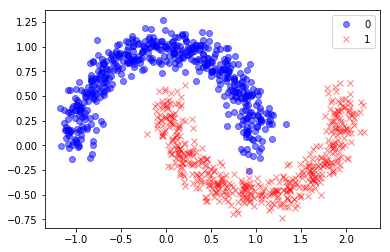

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
X.shape

(1000, 2)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

/Users/ryanrunchey/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Shallow Model

In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [9]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 89us/step


In [10]:
results

[0.31765335619449614, 0.8400000007947286]

In [11]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.840


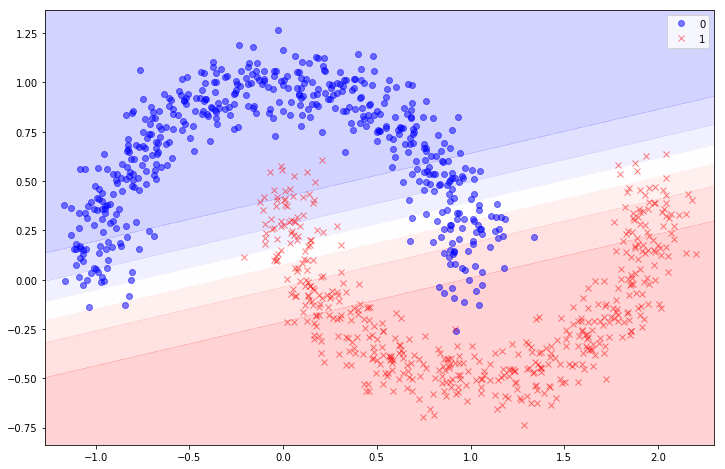

In [12]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Deep model

In [13]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [15]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 415us/step


[0.0028751495589191714, 1.0]

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

300/300 [==============================] - 0s 26us/step
The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


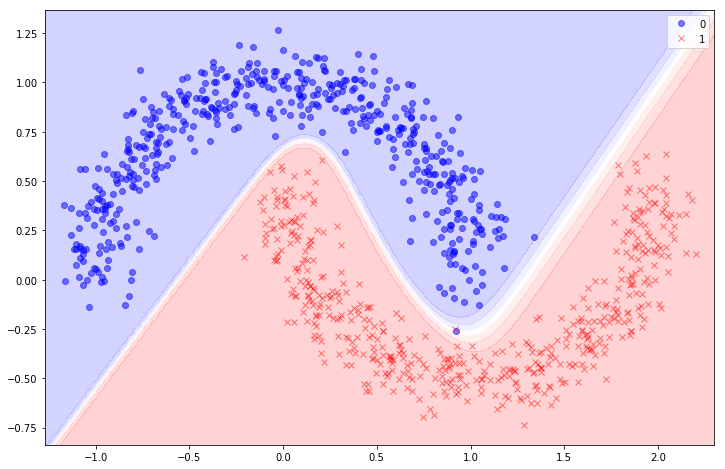

In [18]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [19]:
df = pd.read_csv('../data/iris.csv')

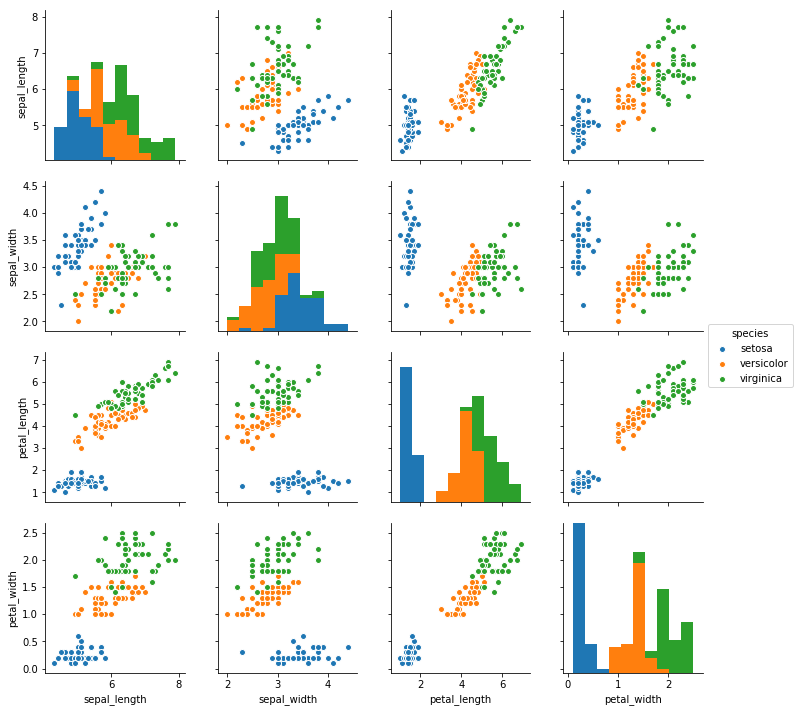

In [20]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [24]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [25]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [26]:
from keras.utils.np_utils import to_categorical

In [27]:
y_cat = to_categorical(y)

In [28]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [30]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 0s 3ms/step - loss: 2.4475 - acc: 0.3333 - val_loss: 1.1154 - val_acc: 0.3333
Epoch 2/20
108/108 [==============================] - 0s 265us/step - loss: 1.6694 - acc: 0.2963 - val_loss: 1.2141 - val_acc: 0.0833
Epoch 3/20
108/108 [==============================] - 0s 112us/step - loss: 1.0317 - acc: 0.3889 - val_loss: 1.3886 - val_acc: 0.0833
Epoch 4/20
108/108 [==============================] - 0s 144us/step - loss: 0.9727 - acc: 0.4167 - val_loss: 0.7358 - val_acc: 0.5000
Epoch 5/20
108/108 [==============================] - 0s 182us/step - loss: 0.6629 - acc: 0.7315 - val_loss: 0.5966 - val_acc: 0.5000
Epoch 6/20
108/108 [==============================] - 0s 99us/step - loss: 0.5903 - acc: 0.8148 - val_loss: 0.5929 - val_acc: 0.5000
Epoch 7/20
108/108 [==============================] - 0s 158us/step - loss: 0.5323 - acc: 0.6944 - val_loss: 0.6153 - val_acc: 0.5000
Epoch 8/20
108/108 [

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred[:5]

array([[6.6366128e-04, 2.0704518e-01, 7.9229116e-01],
       [9.1823465e-01, 8.1208356e-02, 5.5698655e-04],
       [4.7851831e-02, 7.1922106e-01, 2.3292714e-01],
       [1.3054298e-01, 7.6702178e-01, 1.0243528e-01],
       [3.4159468e-03, 5.1298243e-01, 4.8360157e-01]], dtype=float32)

In [34]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.92      1.00      0.96        11
          2       1.00      0.86      0.92         7

avg / total       0.97      0.97      0.97        30



In [37]:
confusion_matrix(y_test_class, y_pred_class)

array([[12,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  6]])

## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

In [41]:
df_pima = pd.read_csv('../data/diabetes.csv')

In [42]:
df_pima.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [141]:
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

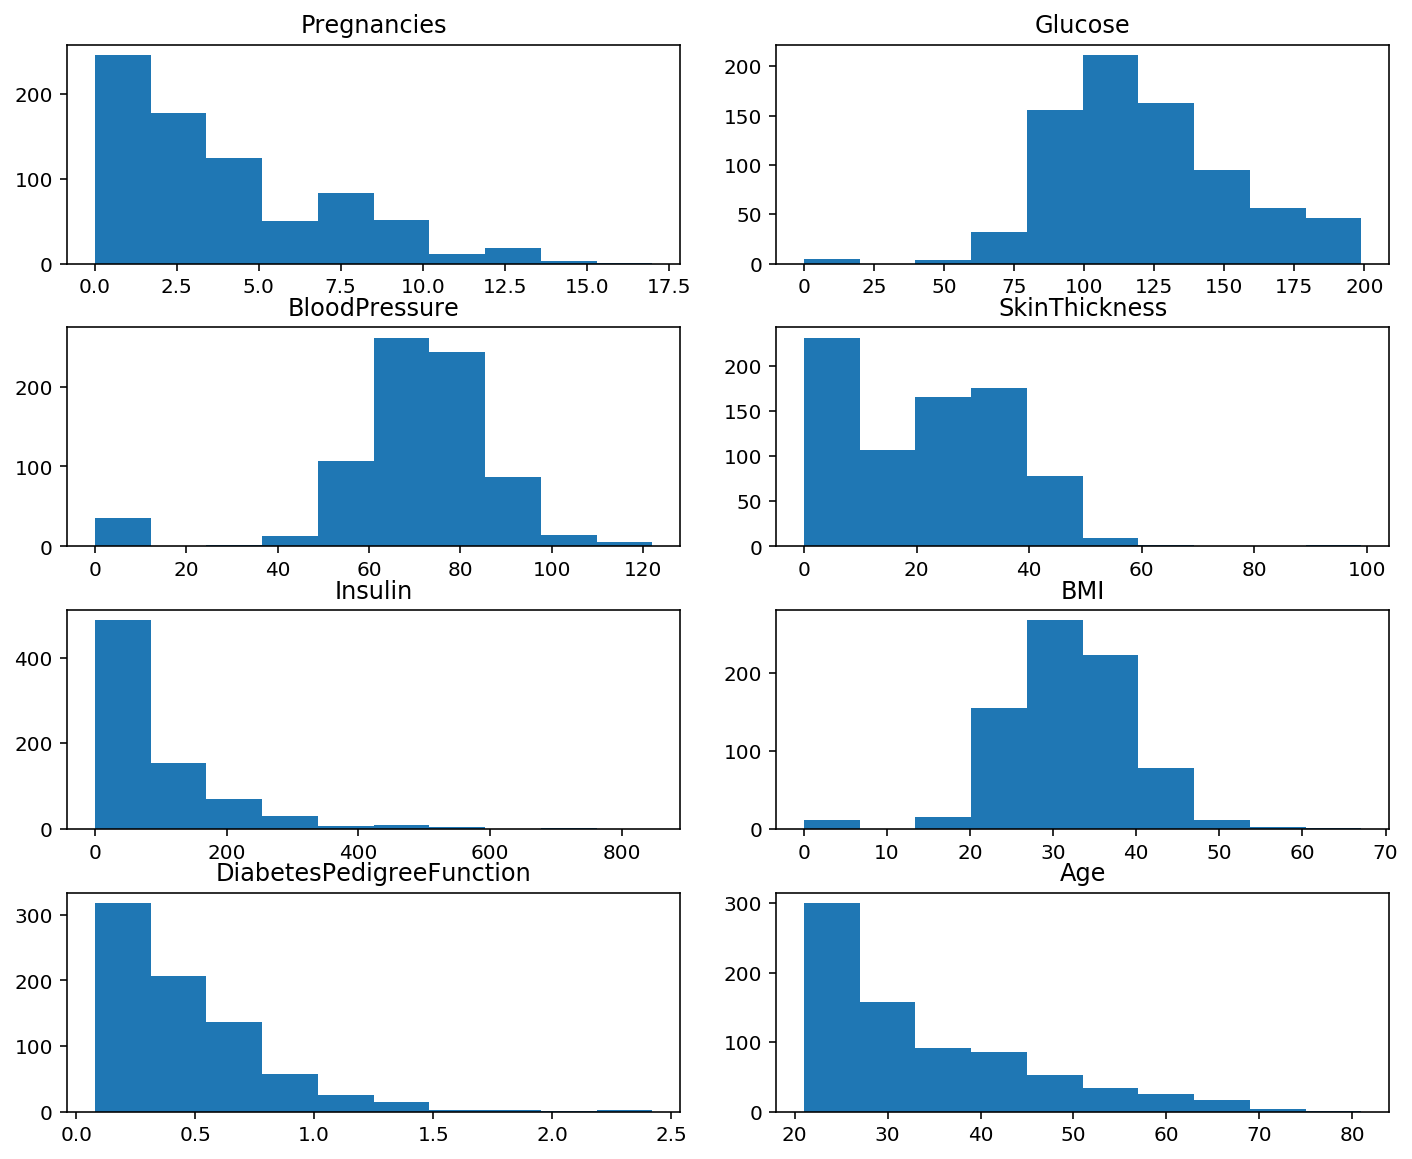

In [142]:
rows = 4
cols = 2
count = 0

fig, axes = plt.subplots(nrows=rows,ncols=cols, figsize=(10,8), edgecolor='k')
fig.tight_layout()

for row in range(rows):
    for col in range(cols):
        axes[row,col].hist(df_pima.iloc[:,count])
        title = df_pima.columns[count]
        axes[row,col].set_title('{}'.format(title))
        count += 1

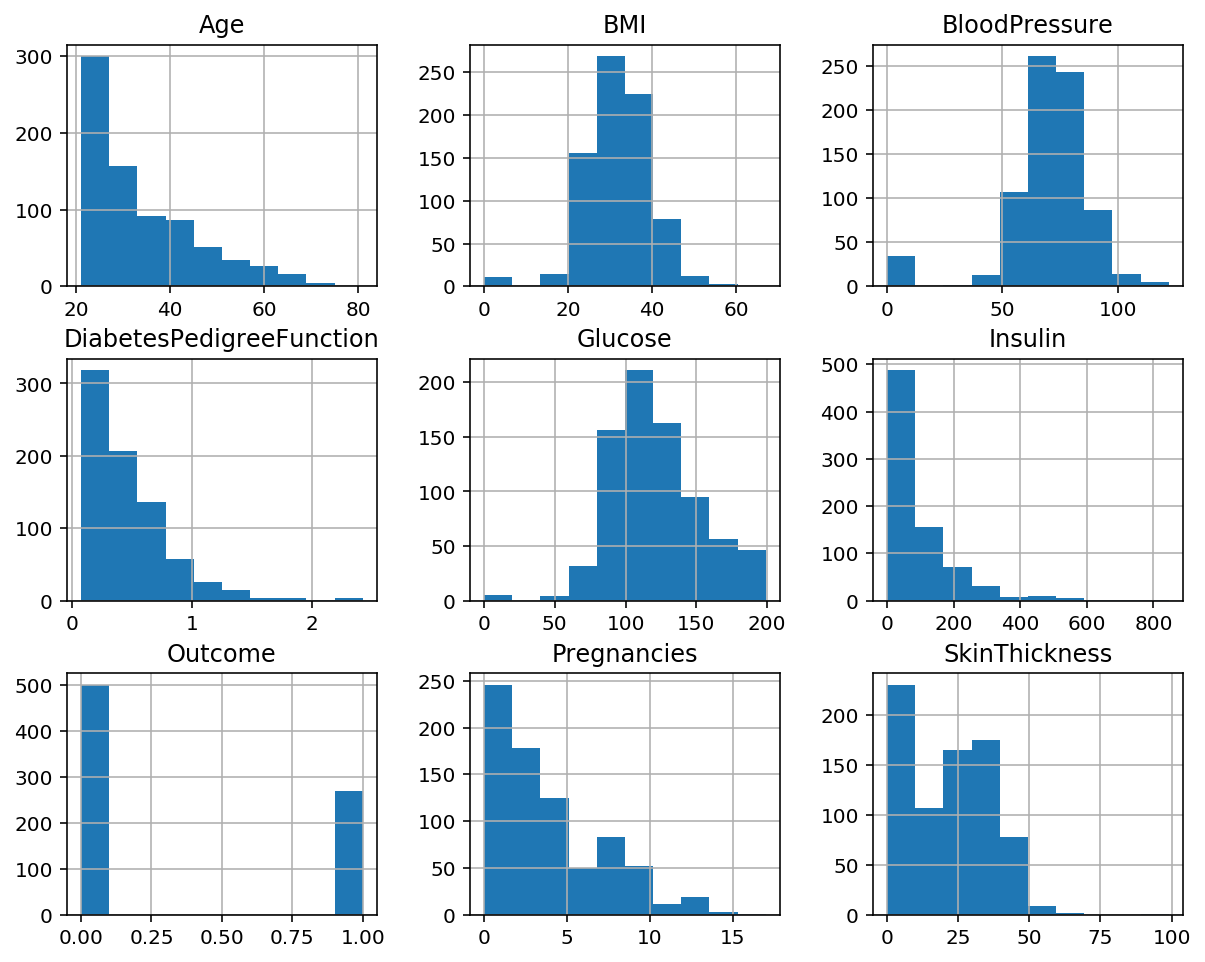

In [143]:
# Another way to run a hist on all variables including the dependent variable
df_pima.hist(figsize=(10,8));

Pregnancies                    Axes(0.125,0.657941;0.227941x0.222059)
Glucose                     Axes(0.398529,0.657941;0.227941x0.222059)
BloodPressure               Axes(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  Axes(0.125,0.391471;0.227941x0.222059)
Insulin                     Axes(0.398529,0.391471;0.227941x0.222059)
BMI                         Axes(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          Axes(0.125,0.125;0.227941x0.222059)
Age                            Axes(0.398529,0.125;0.227941x0.222059)
Outcome                        Axes(0.672059,0.125;0.227941x0.222059)
dtype: object

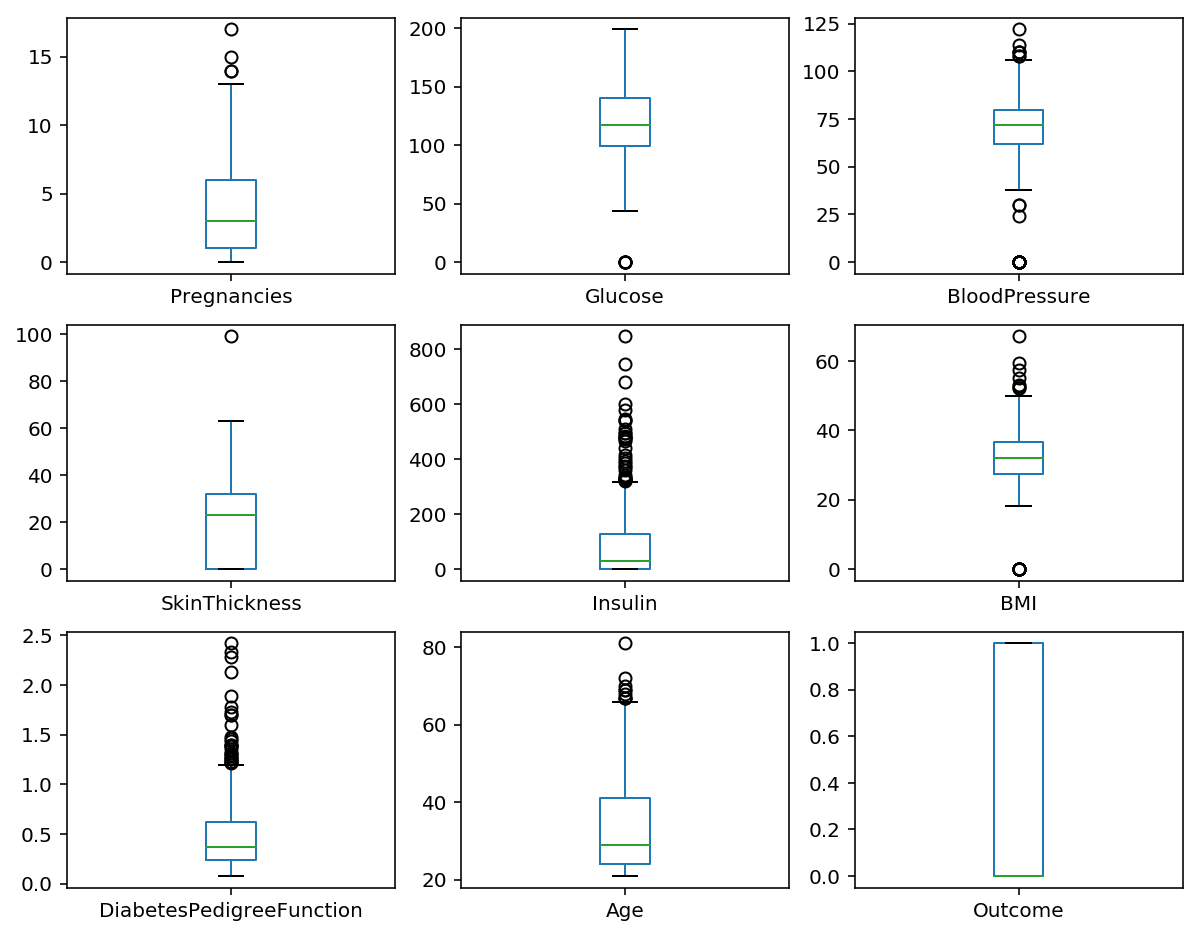

In [144]:
df_pima.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

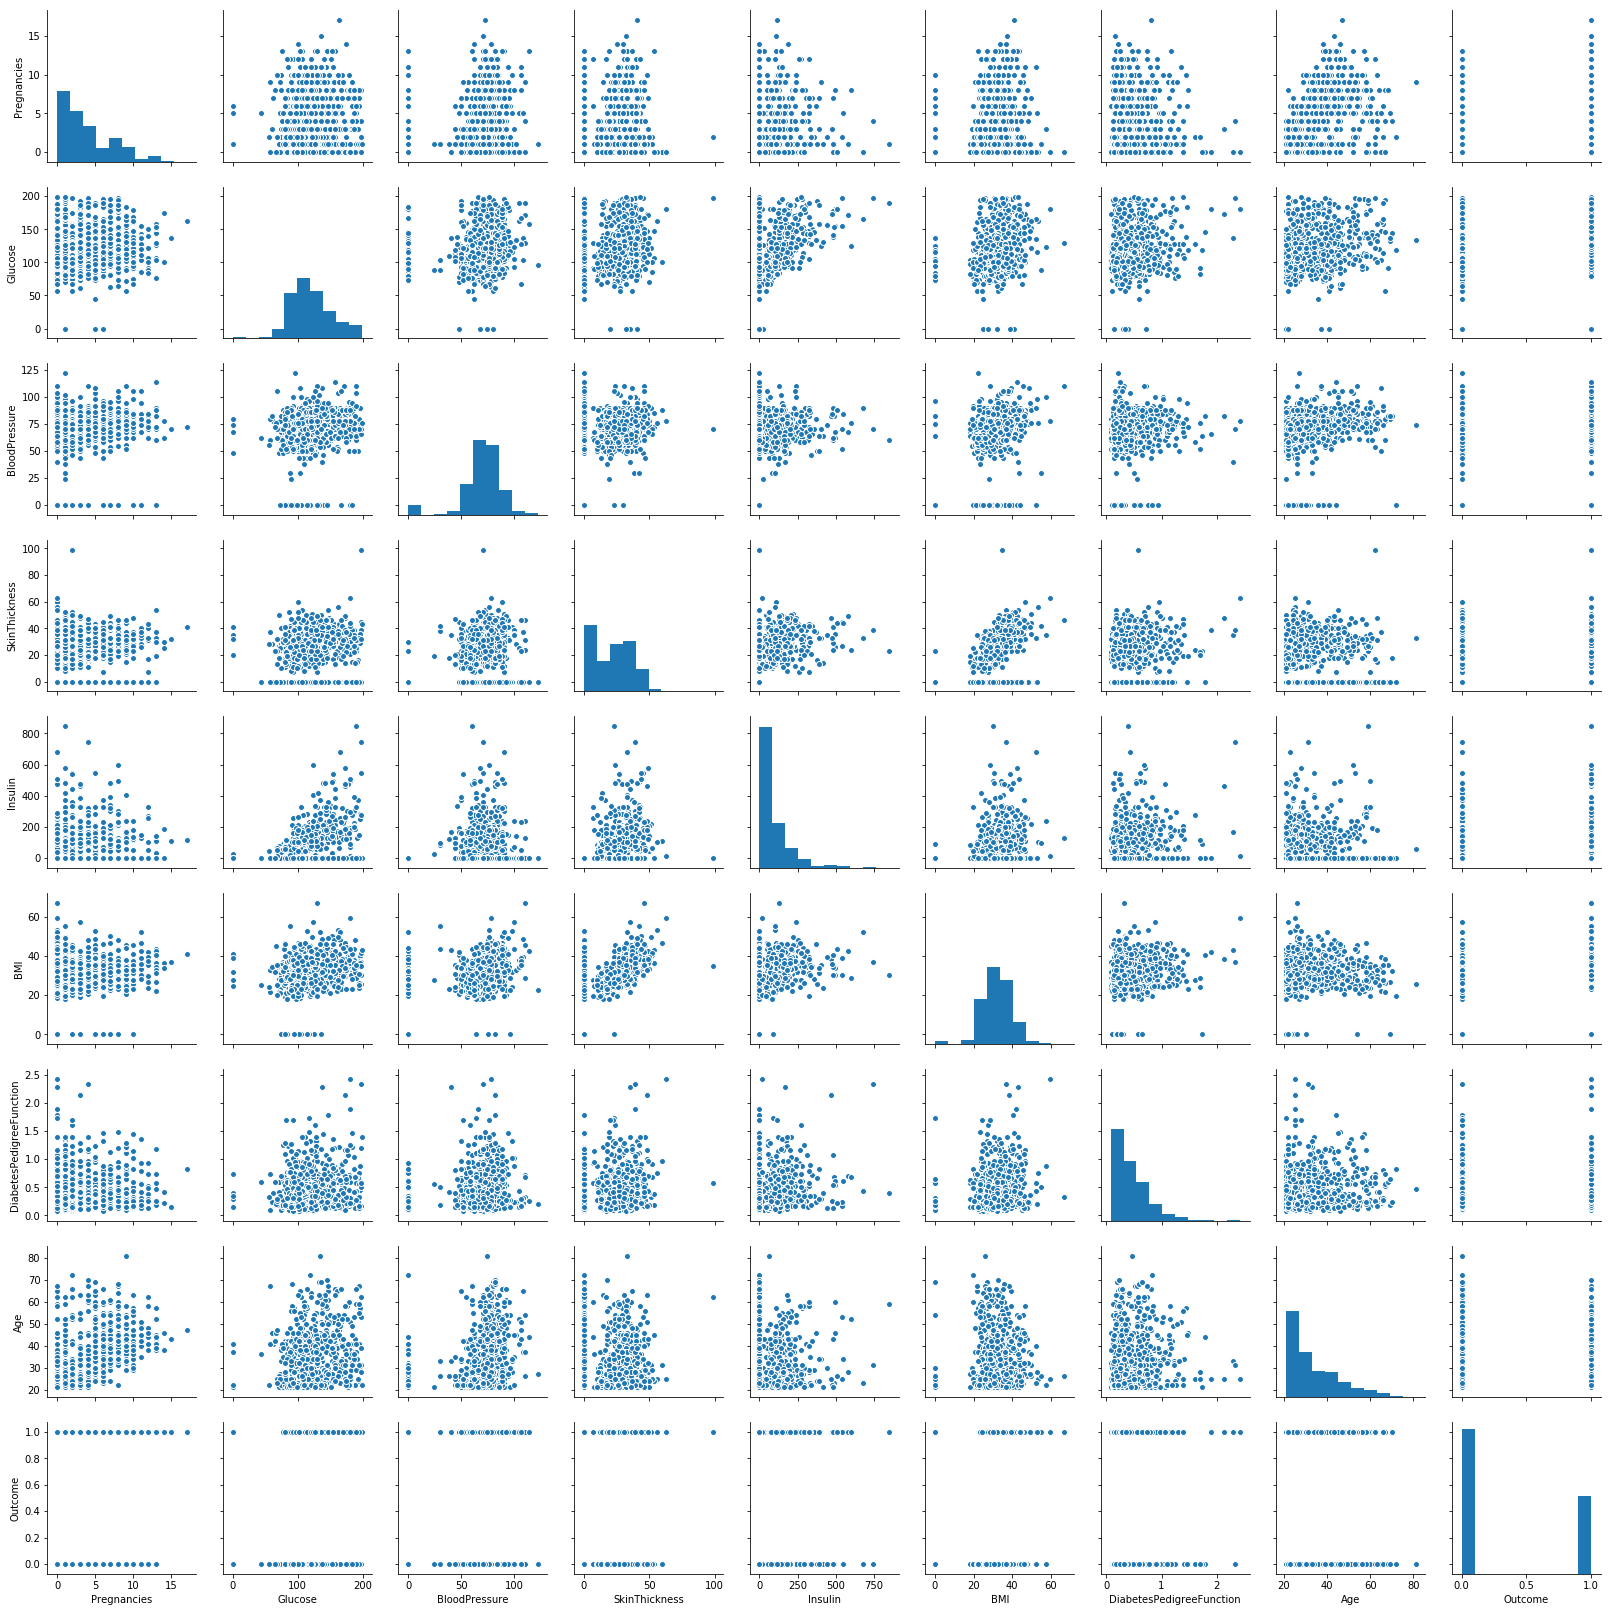

In [66]:
sns.pairplot(df_pima)

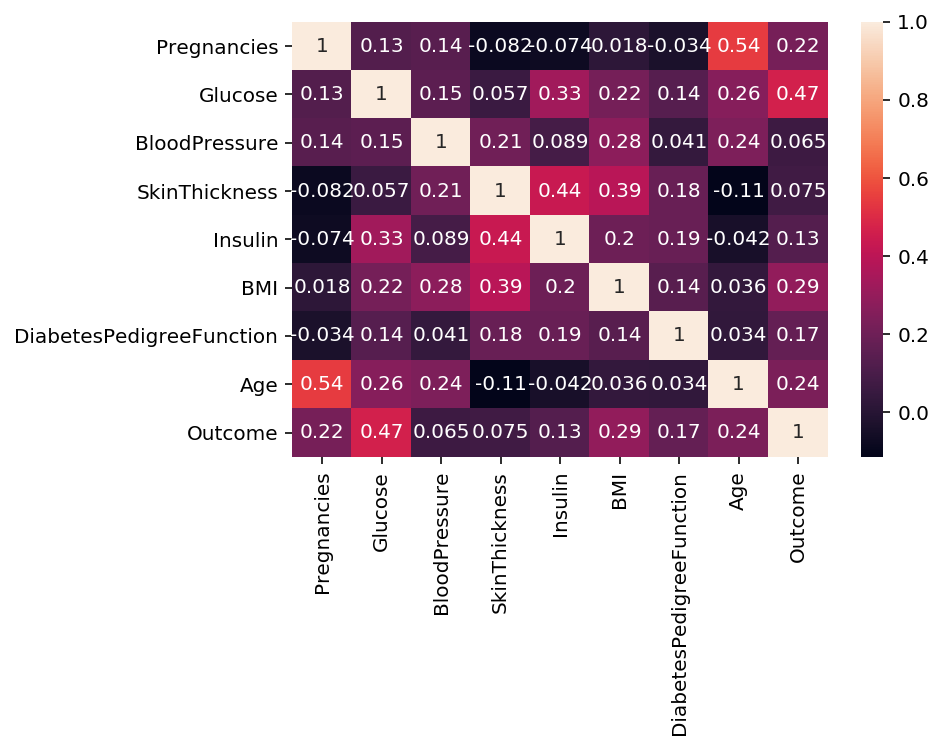

In [147]:
# draw a heatmap of correlations
corr = df_pima[df_pima.columns].corr()
sns.heatmap(corr, annot=True);

In [133]:
df_pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [69]:
target = 'Outcome'
X = df_pima.drop(target, axis=1)
y = df_pima[target]

In [180]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [192]:
scaler = MinMaxScaler()
# scaler = StandardScaler()

In [193]:
X = scaler.fit_transform(X)

## Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

In [194]:
# split data in a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [195]:
# define a sequential model with at least one inner layer
model = Sequential()
model.add(Dense(4, input_shape=(8,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [196]:
# fit model on training set
model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.1)

In [197]:
# test trained model on test data
results = model.evaluate(X_test, y_test)

154/154 [==============================] - 0s 52us/step


In [198]:
# check the accuracy score
results

[0.5363646064485822, 0.7337662368625789]

In [199]:
# check the accuracy score
print("The accuracy on the model test set:\t{:0.3f}".format(results[1]))

The accuracy on the model test set:	0.734


In [200]:
y_pred = np.round(model.predict(X_test)).astype(int)

In [201]:
# check the confusion matrix
confusion_matrix(y_test, y_pred)

array([[92,  8],
       [33, 21]])

In [202]:
# check the classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.92      0.82       100
          1       0.72      0.39      0.51        54

avg / total       0.73      0.73      0.71       154



## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

In [149]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [157]:
models = []
models.append(["LR", LogisticRegression()])
models.append(["NB", GaussianNB()])
models.append(["KNN", KNeighborsClassifier()])
models.append(["DT", DecisionTreeClassifier()])
models.append(["SVM", SVC()])

In [158]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_score = cross_val_score(model, X_train, y=y_train, cv=kfold, scoring='accuracy')
    names.append(name)
    results.append(cv_score)
for i in range(len(results)):
    print("Average CV Score for model \t{} \t is\t{:0.3f}".format(names[i],results[i].mean()))

Average CV Score for model 	LR 	 is	0.773
Average CV Score for model 	NB 	 is	0.767
Average CV Score for model 	KNN 	 is	0.715
Average CV Score for model 	DT 	 is	0.719
Average CV Score for model 	SVM 	 is	0.773


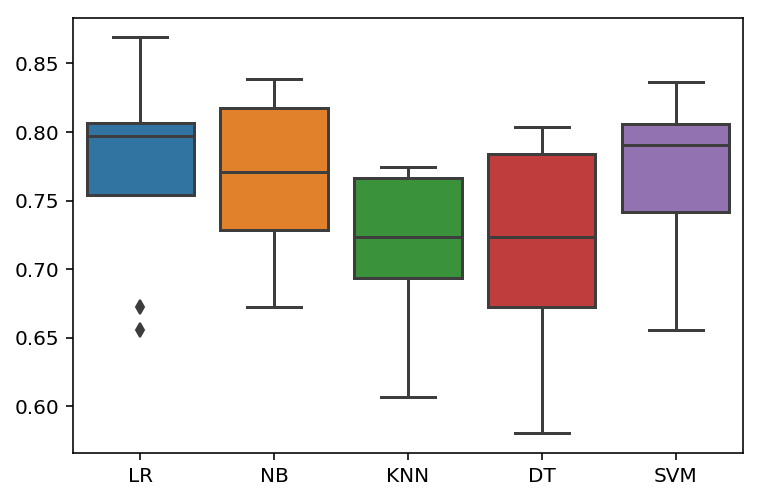

In [161]:
# visualize the results
ax = sns.boxplot(data=results)
ax.set_xticklabels(names);

In [162]:
# final prediction using test data
# LogisticRegression()

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [163]:
# check the accuracy
print(accuracy_score(y_test, y_pred))

0.7142857142857143


In [164]:
# final prediction using test data
# Support Vector Machine
svm = SVC()
svm = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [165]:
# check the accuracy score
print(accuracy_score(y_test, y_pred))

0.7337662337662337


In [166]:
# print the classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.72      0.96      0.82       100
          1       0.81      0.31      0.45        54

avg / total       0.75      0.73      0.69       154



In [172]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[96,  4],
       [37, 17]])

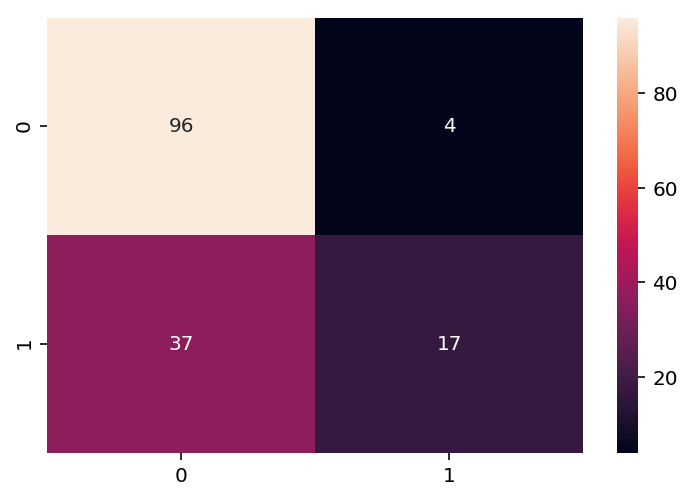

In [175]:
# visualize the confusion matrix with a heatmap
labels = ["0", "1"]
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels);

### Restrict Features to 4

In [177]:
# Feature Extraction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [207]:
# re-import data before feature scaling
df_pima = pd.read_csv('../data/diabetes.csv')

In [208]:
target = 'Outcome'
X = df_pima.drop(target, axis=1)
y = df_pima[target]

In [209]:
select_top_4 = SelectKBest(score_func=chi2, k=4)

In [210]:
### REVISIT ###
fit = select_top_4.fit(X,y)
features=fit.transform(X)

/Users/ryanrunchey/anaconda3/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [211]:
features[:5]

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       [ 89. ,  94. ,  28.1,  21. ],
       [137. , 168. ,  43.1,  33. ]])

In [204]:
df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [213]:
X_features = pd.DataFrame(data=features, columns=['Glucose', 'Insulin', 'BMI', 'Age'])
X_features.head(2)

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0


In [214]:
rescaled_data = StandardScaler().fit_transform(X_features)
X = pd.DataFrame(data=rescaled_data, columns=X_features.columns)
X.head(2)

,Glucose,Insulin,BMI,Age
0,0.848324,-0.692891,0.204013,1.425995
1,-1.123396,-0.692891,-0.684422,-0.190672


### Run Neural Network with 4 Features

In [230]:
# keras doesn't like dataframes, so turn X back into an array
X = X.values

In [231]:
# split data in a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [232]:
# define a sequential model with at least one inner layer
model = Sequential()
model.add(Dense(4, input_shape=(4,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [233]:
# fit model on training set
model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.1)

In [234]:
# test trained model on test data
results = model.evaluate(X_test, y_test)

154/154 [==============================] - 0s 259us/step


In [235]:
# check the accuracy score
results

[0.5570252947993093, 0.7532467509244943]

In [236]:
# check the accuracy score
print("The accuracy on the model test set:\t{:0.3f}".format(results[1]))

The accuracy on the model test set:	0.753


In [237]:
y_pred = np.round(model.predict(X_test)).astype(int)

In [238]:
# check the confusion matrix
confusion_matrix(y_test, y_pred)

array([[84, 16],
       [22, 32]])

In [239]:
# check the classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.84      0.82       100
          1       0.67      0.59      0.63        54

avg / total       0.75      0.75      0.75       154



In [242]:
# The results are similar for my neural network models using all or just four features

## Exercise 4

[Tensorflow playground](http://playground.tensorflow.org/) is a web based neural network demo. It is really useful to develop an intuition about what happens when you change architecture, activation function or other parameters. Try playing with it for a few minutes. You don't need do understand the meaning of every knob and button in the page, just get a sense for what happens if you change something. In the next chapter we'll explore these things in more detail.
